In [1]:
import os
import json
import jieba

import numpy as np

In [2]:
path = './text'
# ch = [chr(ord('a') + i) for i in range(26)]
# ch1 = [chr(ord('A') + i) for i in range(26)]
# ch2 = [chr(ord('0') + i) for i in range(10)]
# ch3 = [',', '-', '.', '、', '_', '""', '，', '(', '和', '=""', '"', ':', '/', "'", '=', ')', '&', '|', '。']

stop = []

with open('stopwords.txt' , 'r' , encoding='utf8') as f:
    for i in f.readlines():
        stop.append(i.replace('\n' , ''))
    f.close()

text = set()

for idx , i in enumerate(os.listdir('./wiki_zh')):
    print(idx)
    if idx >= 5:
        break
    path = './wiki_zh/' + i
    for j in os.listdir(path):
        with open(path + '/' + j , 'r' , encoding='utf8') as f:
            for s in f.readlines():
                d = json.loads(s)
                t = d['text'].replace('\n' , '')
                for s in stop:
                    t.replace(s , '')
                for word in jieba.cut(t):
                    # print(word)
                    text.add(word)

            f.close()

with open('./text/text.txt' , 'a' , encoding='utf-8') as f:
    for i in text:
        f.write(i + ' ')
    f.close()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xht\AppData\Local\Temp\jieba.cache


0


Loading model cost 0.554 seconds.
Prefix dict has been built successfully.


1
2
3
4
5


In [5]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

model = Word2Vec(
    LineSentence(open('./text/text.txt', 'r', encoding='utf8')),
    sg = 0, # sg=1是skip-gram算法，对低频词敏感；默认sg=0为CBOW算法
    # size = 100, # size是输出词向量的维数
    window = 3, # window是句子中当前词与目标词之间的最大距离
    min_count = 1 # min_count是对词进行过滤
)

# 词向量保存
model.wv.save_word2vec_format('data.vector', binary=False)

# 模型保存
model.save('./text/test.model')

In [6]:
model

In [7]:
import gensim
vector = gensim.models.KeyedVectors.load_word2vec_format('data.vector')

In [8]:
dic = model.wv.index_to_key

In [9]:
print(dic)
print(type(vector['米']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
d = {}
for idx , i in enumerate(dic):
    if idx <= 50:
        continue
    if idx >= 100:
        break
    if len(i) >= 3 and len(i) <= 1:
        continue
    x = vector[i].reshape((2 , 50))
    x = pca.fit_transform(x)
    # xx = np.average(np.max(x , axis=1))
    # yy = np.average(np.max(x , axis=0))
    d[i] = x[0]

{'布鲁是': 0, '饮毕': 1, '袭镇': 2, 'Middlebourne': 3, '克肖德': 4, '酷旱': 5, '小提示': 6, '圆桌会议': 7, 'DiDaDi': 8, '乔一琦': 9, '☆': 10, '命康义诚': 11, '44724': 12, '数来': 13, '金盈': 14, '余场': 15, '二维码': 16, 'Hilara': 17, 'MIYAKO': 18, '朱士烈': 19, 'ErbB2': 20, '属泉类': 21, 'Maisie': 22, '牛金引': 23, '有齐': 24, '宽法': 25, '125IN': 26, '拜帖': 27, '刘德旺': 28, '平知章': 29, '生阿努': 30, 'D10': 31, '经向外': 32, '白带': 33, 'MSIN': 34, '塑胶管': 35, '记为': 36, '三密': 37, '乐倍': 38, '遵外': 39, 'ElGamal': 40, '计而': 41, '序例': 42, '时和式': 43, '施岗站': 44, '唇脂': 45, '郑桓公在': 46, '箴铭类': 47, '若以': 48}


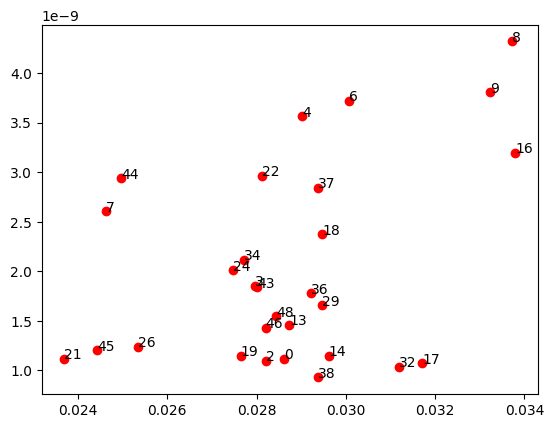

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig , ax = plt.subplots()
word = {}
stop = []
with open('stopwords.txt' , 'r' , encoding='utf8') as f:
    for i in f.readlines():
        stop.append(i)

for i , (txt , pos) in enumerate(d.items()):
    word[txt] = i
    if pos[0] < 0:
        continue
    ax.scatter(pos[0] , pos[1] , c='r')
    ax.annotate(i , xy=(pos[0] , pos[1]))
print(word)